## Age–Survival Regression

**Course:** CDS 2413 — Programming for Data Science  
**CRN:** 14350  
**Project:** Cancer Outcome Classification (UAE Synthetic Records)  
**Group:** 3  
**Members:** Aisha Alshamsi (H00535685), Sara Almulla (H00532724)  
**Dataset Size:** 10,000 records

**Derive Survival_Months**

In [1]:
import pandas as pd, numpy as np
df = pd.read_csv("cancer_dataset_uae.csv")
df["Diagnosis_Date"] = pd.to_datetime(df["Diagnosis_Date"], errors="coerce")
df["Death_Date"]     = pd.to_datetime(df["Death_Date"], errors="coerce")
df["Survival_Months"] = (df["Death_Date"] - df["Diagnosis_Date"]).dt.days / 30.44
df_deceased = df[df["Death_Date"].notna()].copy()
df_deceased = df_deceased[["Age","Survival_Months"]].dropna()
df_deceased.shape


(992, 2)

**Train/Test Split (random_state=42)**

In [2]:
from sklearn.model_selection import train_test_split
X = df_deceased[["Age"]].astype(float)
y = df_deceased["Survival_Months"].astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape


((793, 1), (199, 1))

**Fit Simple Linear Regression**

In [3]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
intercept, slope = lr.intercept_, lr.coef_[0]
print(f"Fitted line: ŷ = {intercept:.3f} + {slope:.5f}·Age")


Fitted line: ŷ = 17.592 + -0.00365·Age


**Test Metrics vs Baseline**

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = lr.predict(X_test).ravel()
y_true = np.asarray(y_test).ravel()

mae  = mean_absolute_error(y_true, y_pred)
mse  = mean_squared_error(y_true, y_pred)     # MSE
rmse = np.sqrt(mse)                           # RMSE (manual, version-safe)
r2   = r2_score(y_true, y_pred)

# Baseline: predict training mean of y
y_base = np.repeat(y_train.mean(), repeats=len(y_true))
mae_b  = mean_absolute_error(y_true, y_base)
mse_b  = mean_squared_error(y_true, y_base)
rmse_b = np.sqrt(mse_b)

print(f"Model  → MAE={mae:.2f}  RMSE={rmse:.2f}  R²={r2:.3f}")
print(f"Baseline → MAE={mae_b:.2f}  RMSE={rmse_b:.2f}")


Model  → MAE=8.68  RMSE=9.74  R²=-0.005
Baseline → MAE=8.68  RMSE=9.73


**Plot: Fit Line & Residuals**

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


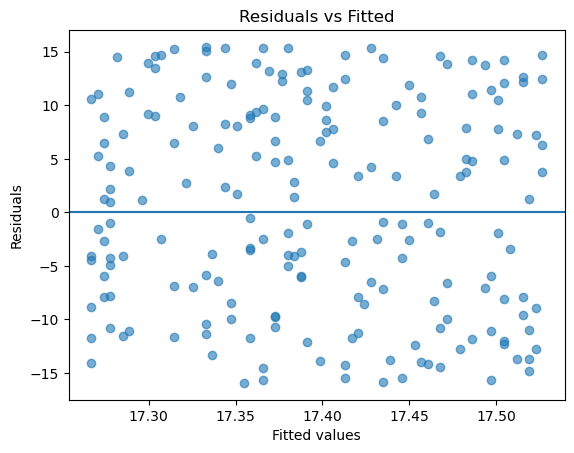

In [6]:
import matplotlib.pyplot as plt

# (1) Age vs Survival_Months with fitted line
plt.figure()
plt.scatter(X_test["Age"], y_test, alpha=0.6)
x_line = np.linspace(X_test["Age"].min(), X_test["Age"].max(), 100)
y_line = lr.predict(x_line.reshape(-1,1))
plt.plot(x_line, y_line)
plt.xlabel("Age"); plt.ylabel("Survival_Months")
plt.title("Age vs Survival_Months (with fitted line)")
plt.show()

# (2) Residuals vs fitted
residuals = y_test - y_pred
plt.figure()
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0)
plt.xlabel("Fitted values"); plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()
